In [44]:
# %%capture
# %pip install pingouin
# %pip install ppscore
# %pip install skimpy

In [73]:
# Data manipulation
#===============================================================================
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

# Data visualization
#===============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from skimpy import skim

# Stats
#===============================================================================
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
# import ppscore as pps

# Data preprocessing
#===============================================================================
from sklearn.preprocessing import (OneHotEncoder, 
                                   LabelEncoder)

from sklearn.preprocessing import RobustScaler

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Models
#===============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Metrics
#===============================================================================
from sklearn.metrics import (f1_score, 
                             confusion_matrix, 
                             classification_report, 
                             roc_curve, 
                             roc_auc_score, RocCurveDisplay)

# Counter
#===============================================================================
from collections import Counter

# tqdm
#===============================================================================
from tqdm.auto import tqdm

# warnings
#===============================================================================
import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_csv('CreditWorthiness.csv')

In [47]:
data.shape

(1000, 21)

In [48]:
data.nunique()


Cbal             4
Cdur            33
Chist            4
Cpur            10
Camt           921
Sbal             5
Edur             5
InRate           4
MSG              4
Oparties         3
Rdur             4
Prop             4
age             53
inPlans          3
Htype            3
NumCred          4
JobType          4
Ndepend          2
telephone        2
foreign          2
creditScore      2
dtype: int64

In [49]:
data['creditScore'].value_counts()

creditScore
good    700
bad     300
Name: count, dtype: int64

In [50]:
data.isnull().sum()

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

In [51]:
data.duplicated().sum()

0

In [52]:
data.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",more than 3 years,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,more than 3 years,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

In [54]:
# Find columns with unique values not more than 5
saft_categ = [col for col in data.columns if data[col].nunique() <= 5]

# Display unique values for those columns
for col in saft_categ:
    print(f"Column: {col}")
    print(data[col].unique())
    print("-" * 50)

Column: Cbal
['0 <= Rs. < 2000' 'no checking account' ' Rs. < 0' 'Rs. >=2000']
--------------------------------------------------
Column: Chist
['all settled till now' 'dues not paid earlier' 'none taken/all settled'
 'all settled']
--------------------------------------------------
Column: Sbal
['Rs. < 1000' 'no savings account' 'Rs. >= 10,000' '5000 <= Rs. < 10,000'
 '1000 <= Rs. < 5,000']
--------------------------------------------------
Column: Edur
['1 to 4 years' 'more than 7 years' 'less than 1 year' '4 to 7 years'
 'not employed']
--------------------------------------------------
Column: InRate
[2 4 1 3]
--------------------------------------------------
Column: MSG
['married or widowed male' 'single male'
 'divorced or separated or married female' 'divorced or separated male']
--------------------------------------------------
Column: Oparties
['no one' 'yes, guarantor' 'yes, co-applicant']
--------------------------------------------------
Column: Rdur
['less than a year' '

In [ ]:
# NUMERICAL AND CATEGORICAL DATA
numerical_features = data.select_dtypes(include = ['int','float']).columns.to_list()
categorical_features = data.select_dtypes(include = ['object','category']).columns.to_list()

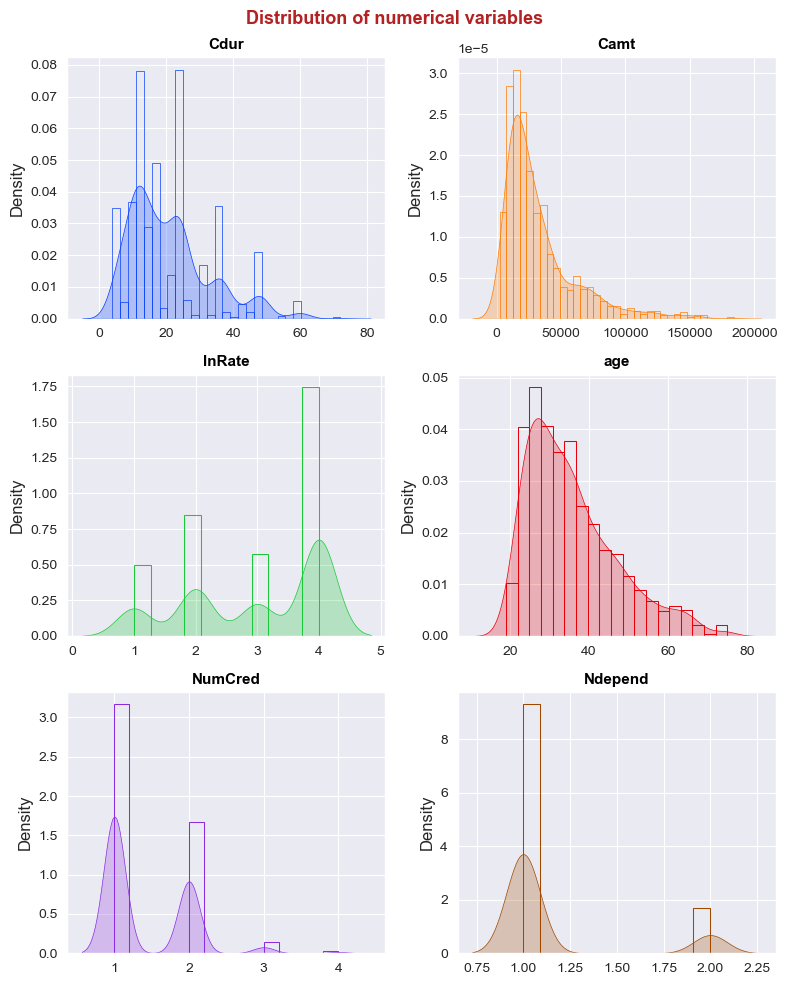

In [86]:
# distribution of numerical values

sns.set_style('darkgrid')
colors = sns.color_palette(palette = 'bright', 
                           n_colors = len(numerical_features))

fig,ax = plt.subplots(nrows = 3, ncols = 2, figsize = (8, 10))
ax = ax.flat

for i,feature in enumerate(numerical_features):
    sns.kdeplot(data, x = feature, fill = True, color = colors[i], ax = ax[i])
    sns.histplot(data, x = feature, stat = 'density', fill = False, color = colors[i], ax = ax[i])
    ax[i].set_xlabel('')
    ax[i].set_title(feature, fontsize = 11, fontweight = 'bold', color = 'black')
 
fig.suptitle("Distribution of numerical variables", fontsize = 13, fontweight = 'bold', color = 'firebrick')
fig.tight_layout()
fig.show()

In [76]:
#Normality test
pg.normality(data[numerical_features], method = "normaltest")

,W,pval,normal
Cdur,156.054121,1.298010e-34,False
Camt,396.042171,1.001233e-86,False
InRate,842.425283,1.174016e-183,False
age,133.888657,8.442042e-30,False
NumCred,208.700530,4.800159e-46,False
Ndepend,325.065355,2.587945e-71,False


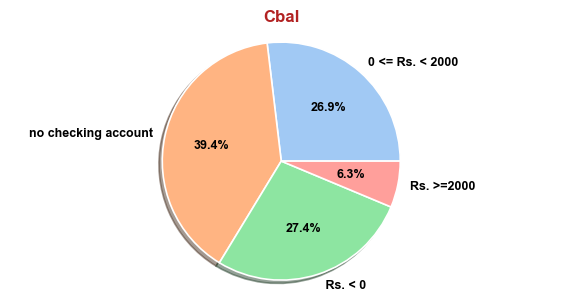

In [77]:
plt.style.use('ggplot')
plt.figure(figsize = (7,3.4))
plt.pie(x = list(Counter(data[categorical_features[0]]).values()), 
        labels = list(Counter(data[categorical_features[0]]).keys()), 
        colors = [color for color in sns.color_palette(palette = 'pastel', n_colors = data[categorical_features[0]].nunique())],
        autopct = "%.1f%%", 
        shadow = True, 
        textprops = {'fontsize':9, 'fontweight':'bold', 'color':'black'}, 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2})
plt.title(categorical_features[0], fontsize = 12, fontweight = 'bold', color = 'firebrick')
plt.axis('equal')
plt.show()

In [56]:
df = pd.read_csv('CreditWorthiness.csv')

# Display dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

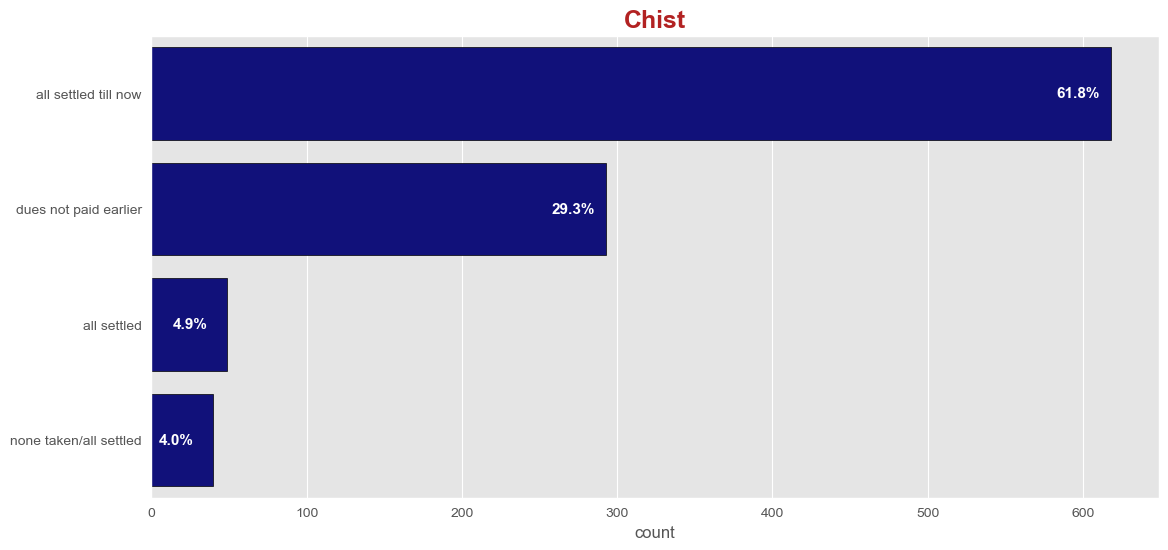

In [78]:
df = data[categorical_features[1]].value_counts()
ordered = sorted(df.items(), key=lambda x: x[1], reverse=True)
order = [ valor for valor, contador in ordered ]

plt.figure(figsize = (13,6))
sns.countplot(data = data, y = categorical_features[1], color = "darkblue", edgecolor = 'black', order = order)
df_sum = df.values.sum()
for i, (valor, contador) in enumerate(ordered):
   pcnt = '{:0.1f}%'.format(100 * contador / df_sum)
   plt.text(contador - 35, i, pcnt, va ='center', fontsize = 11, fontweight = 'bold', color = 'white')
plt.ylabel("")
plt.title(categorical_features[1], fontsize = 18, fontweight = 'bold', color = 'firebrick')
plt.show()

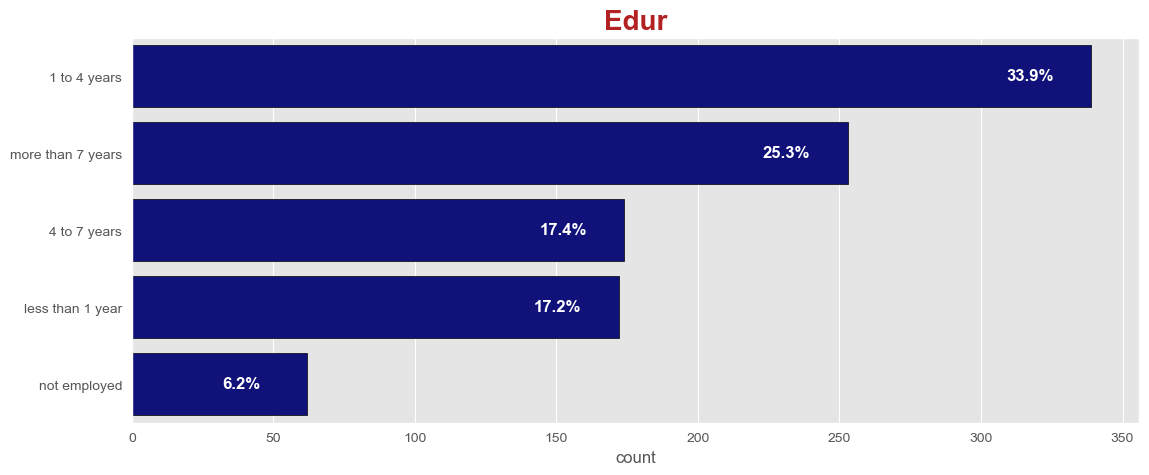

In [79]:
df = data[categorical_features[4]].value_counts()
ordered = sorted(df.items(), key=lambda x: x[1], reverse=True)
order = [ valor for valor, contador in ordered ]

plt.figure(figsize = (13,5))
sns.countplot(data = data, y = categorical_features[4], color = "darkblue", edgecolor = 'black', order = order)
df_sum = df.values.sum()
for i, (valor, contador) in enumerate(ordered):
   pcnt = '{:0.1f}%'.format(100 * contador / df_sum)
   plt.text(contador - 30, i, pcnt, va ='center', fontsize = 12, fontweight = 'bold', color = 'white')
plt.ylabel("")
plt.title(categorical_features[4], fontsize = 20, fontweight = 'bold', color = 'firebrick')
plt.show()

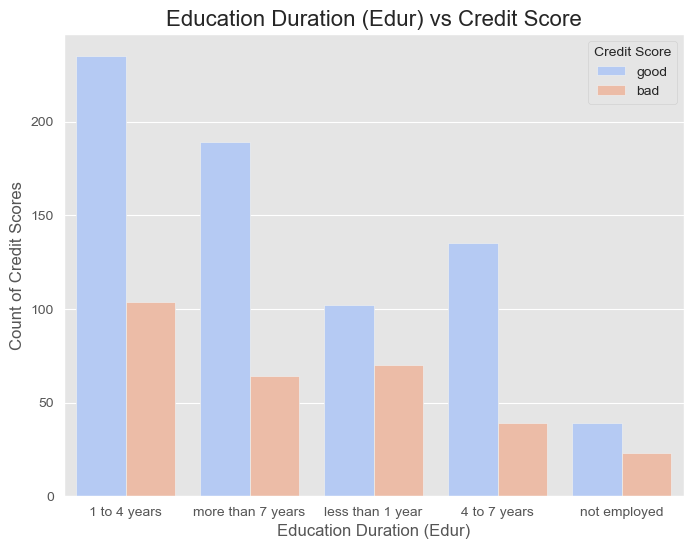

In [83]:
# Create a count plot for Edur vs creditScore
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Edur", hue="creditScore", palette="coolwarm")

# Add title and labels
plt.title("Education Duration (Edur) vs Credit Score", fontsize=16)
plt.xlabel("Education Duration (Edur)", fontsize=12)
plt.ylabel("Count of Credit Scores", fontsize=12)
plt.legend(title="Credit Score", loc="upper right")

# Show the plot
plt.show()

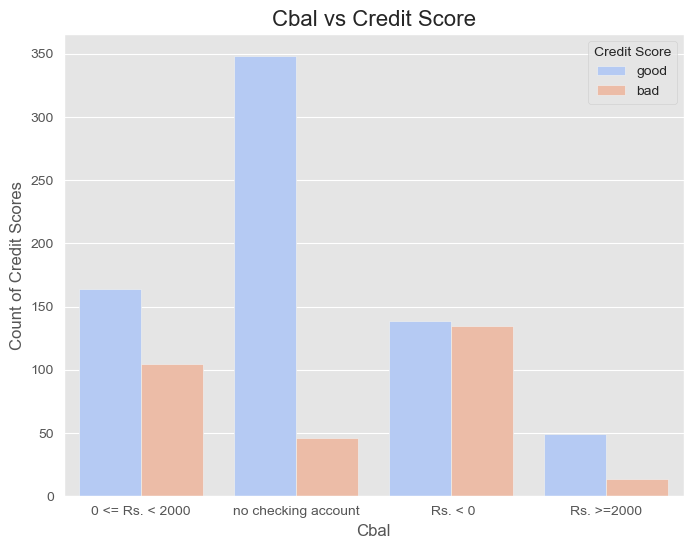

In [84]:
# Create a count plot for Edur vs creditScore
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Cbal", hue="creditScore", palette="coolwarm")

# Add title and labels
plt.title("Cbal vs Credit Score", fontsize=16)
plt.xlabel("Cbal", fontsize=12)
plt.ylabel("Count of Credit Scores", fontsize=12)
plt.legend(title="Credit Score", loc="upper right")

# Show the plot
plt.show()

In [58]:
# Separate target and features
X = df.drop(columns=["creditScore"])
y = df["creditScore"].apply(lambda x: 1 if x == "good" else 0)  # Encode target variable



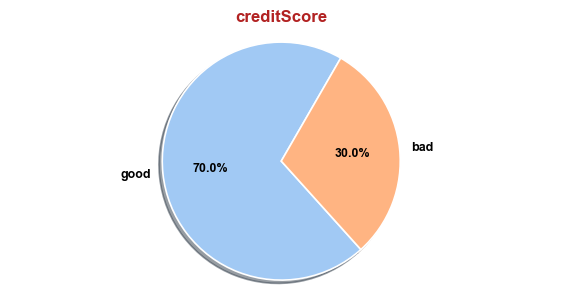

In [87]:
plt.style.use('ggplot')
plt.figure(figsize = (7,3.4))
plt.pie(x = list(Counter(data[categorical_features[14]]).values()), 
        labels = list(Counter(data[categorical_features[14]]).keys()), 
        colors = [color for color in sns.color_palette(palette = 'pastel', n_colors = data[categorical_features[12]].nunique())],
        autopct = "%.1f%%", 
        shadow = True, 
        startangle = 60,
        textprops = {'fontsize':9, 'fontweight':'bold', 'color':'black'}, 
        wedgeprops = {'edgecolor':'white', 'linewidth':1.2})
plt.title(categorical_features[14], fontsize = 12, fontweight = 'bold', color = 'firebrick')
plt.axis('equal')
plt.show()

In [60]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [88]:
numerical_predictors = X_train.select_dtypes(include = ['float','int']).columns.to_list()
categorical_predictors = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()

In [89]:
# x = pd.get_dummies(X) #perform one-hot encoding on categorical data

transformer = [('ohe', 
                OneHotEncoder(drop = 'first', 
                              handle_unknown = 'ignore', 
                              sparse_output = False), 
                categorical_predictors), 
               
               ('scaler', 
               RobustScaler(), 
               numerical_predictors)]

In [90]:
preprocessor = ColumnTransformer(transformers = transformer, 
                                 remainder = 'passthrough', 
                                 n_jobs = -1, 
                                 verbose_feature_names_out = False).set_output(transform = 'pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 674 to 702
Data columns (total 63 columns):
 #   Column                                                           Non-Null Count  Dtype
---  ------                                                           --------------  -----
 0   Cdur                                                             800 non-null    int64
 1   Camt                                                             800 non-null    int64
 2   InRate                                                           800 non-null    int64
 3   age                                                              800 non-null    int64
 4   NumCred                                                          800 non-null    int64
 5   Ndepend                                                          800 non-null    int64
 6   Cbal_ Rs. < 0                                                    800 non-null    bool 
 7   Cbal_0 <= Rs. < 2000                                             

In [93]:
from sklearn.ensemble import RandomForestClassifier

clf1 = LogisticRegression(random_state=42, max_iter=1000)

clf2 = KNeighborsClassifier(n_jobs = -1)

clf3 = RandomForestClassifier(random_state=42, n_estimators=100)

MODELS = [clf1, clf2, clf3]

In [94]:
# Training !!!
for model in tqdm(MODELS):
    name = type(model).__name__

    model.fit(X_train_prep.to_numpy(dtype = np.float32), y_train)

    y_pred_train = model.predict(X_train_prep.to_numpy(dtype = np.float32))
    y_pred_test = model.predict(X_test_prep.to_numpy(dtype = np.float32))
        
        
    score_train = f1_score(y_train, y_pred_train)
    score_test = f1_score(y_test, y_pred_test)
    
    print("==" * 30)
    print(f"\033[1;33m {name} \033[0;m :\n") 
    print(f' F1 Train: {score_train:.4f} |', 
          f'F1 Test: {score_test:.4f}\n')
    print("==" * 30)

  0%|          | 0/3 [00:00<?, ?it/s]

 LogisticRegression  :

 F1 Train: 0.8627 | F1 Test: 0.8316

 KNeighborsClassifier  :

 F1 Train: 0.8694 | F1 Test: 0.8243

 RandomForestClassifier  :

 F1 Train: 1.0000 | F1 Test: 0.8523



In [99]:
# Train Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        60
           1       0.79      0.86      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200



The model performs much better on class 1 than on class 0, as seen in the higher precision, recall, and F1-score for class 1.
Class imbalance might be affecting the performance for class 0 (fewer samples).
To improve the model's performance, consider:
Balancing the dataset (e.g., oversampling class 0 or undersampling class 1).
Using metrics like F1-score or AUC-ROC for evaluation in case of imbalanced data.
Adjusting the decision threshold to better handle class 0.

In [104]:
# Predictions !!!
y_pred_train_final = clf3.predict(X_train_prep.to_numpy(dtype = np.float32))
y_pred_test_final = clf3.predict(X_test_prep.to_numpy(dtype = np.float32))

y_pred_prob_train = clf3.predict_proba(X_train_prep.to_numpy(dtype = np.float32))[:,1]
y_pred_prob_test = clf3.predict_proba(X_test_prep.to_numpy(dtype = np.float32))[:,1]

In [108]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

The model that generalized best was SVC, so we will calculate some additional metrics.

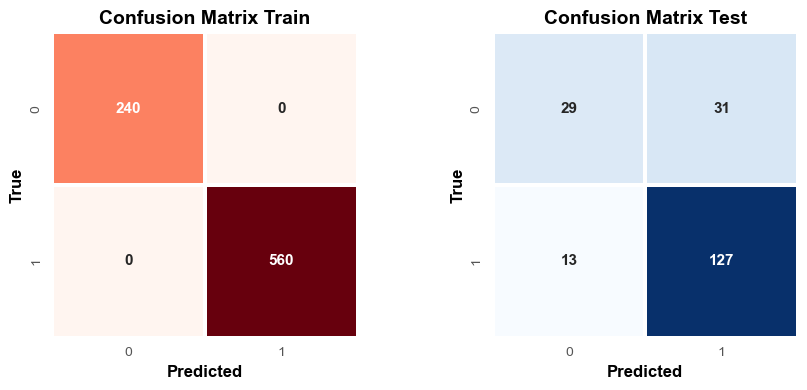

In [109]:
cf_mx_train = confusion_matrix(y_train, y_pred_train_final)
cf_mx_test = confusion_matrix(y_test, y_pred_test_final)

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (9,4))
axs = axs.flat

sns.heatmap(cf_mx_train, cmap = 'Reds', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, linewidths = 1.5, fmt = '', xticklabels = le.classes_, yticklabels = le.classes_, cbar = False, square = True, ax = axs[0])
sns.heatmap(cf_mx_test, cmap = 'Blues', annot = True, annot_kws = {'fontsize':11, 'fontweight':'bold'}, linewidths = 1.5, fmt = '', xticklabels = le.classes_, yticklabels = le.classes_, cbar = False, square = True, ax = axs[1])
axs[0].set_xlabel('Predicted', fontsize = 12, fontweight = "bold", color = "black")
axs[1].set_xlabel('Predicted', fontsize = 12, fontweight = "bold", color = "black")
axs[0].set_ylabel('True', fontsize = 12, fontweight = "bold", color = "black")
axs[1].set_ylabel('True', fontsize = 12, fontweight = "bold", color = "black")
axs[0].set_title('Confusion Matrix Train', fontsize = 14, fontweight = "bold", color = "black")
axs[1].set_title('Confusion Matrix Test', fontsize = 14, fontweight = "bold", color = "black")

fig.tight_layout()
fig.show()

In [63]:
# Recall values from the classification report
recall_class_0 = 0.47
recall_class_1 = 0.86

# Calculate balanced accuracy
balanced_accuracy = (recall_class_0 + recall_class_1) / 2

print(f"Logistic R Balanced Accuracy: {balanced_accuracy:.3f}")

Logistic R Balanced Accuracy: 0.665


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.48      0.57        60
           1       0.80      0.91      0.85       140

    accuracy                           0.78       200
   macro avg       0.75      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



Comparison to Logistic Regression
Overall Accuracy:

Random Forest: 78%
Logistic Regression: 74%
Performance on Class 0:

Random Forest shows improved precision (69% vs. 58%) but has a slightly worse recall (48% vs. 47%). F1-score for class 0 is marginally better in Random Forest.
Performance on Class 1:

Random Forest performs slightly better in precision (80% vs. 79%) but significantly better in recall (91% vs. 86%), leading to a higher F1-score.


In [65]:
# Recall values from the classification report
recall_class_0 = 0.48
recall_class_1 = 0.91

# Calculate balanced accuracy
balanced_accuracy = (recall_class_0 + recall_class_1) / 2

print(f"Random Forest Balanced Accuracy: {balanced_accuracy:.3f}")

Random Forest Balanced Accuracy: 0.695


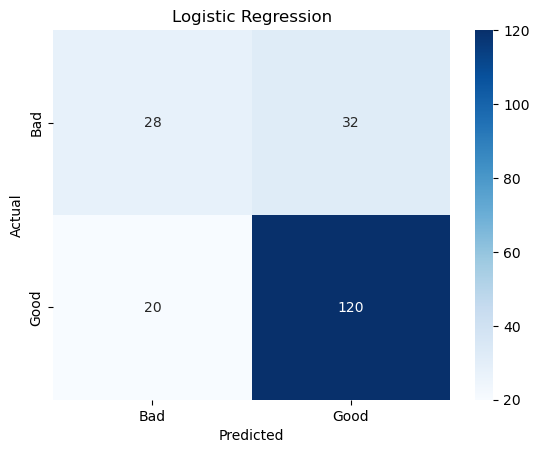

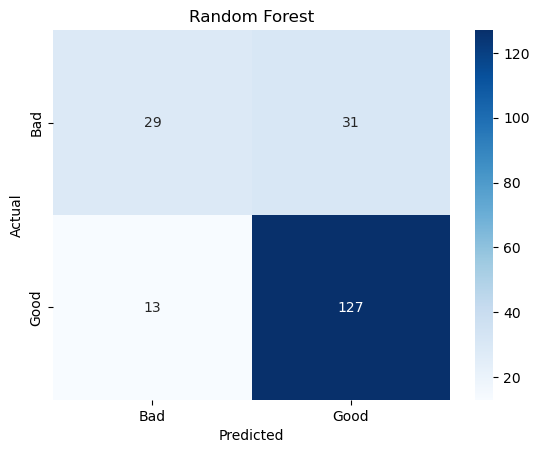

In [66]:
from sklearn.metrics import confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
    plt.title(title)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")




In [67]:
import joblib


joblib.dump(rf, "creditworthiness_model.pkl") # Save Model as file

['creditworthiness_model.pkl']

In [68]:
import joblib


model_path = "creditworthiness_model.pkl"
rf_model = joblib.load(model_path)

In [69]:
# Define a single sample input
sample_data = {
    "Cbal": "low",
    "Cdur": 24,
    "Chist": "good",
    "Cpur": "vehicle",
    "Camt": 200000,
    "Sbal": "moderate",
    "Edur": 3,
    "InRate": 15,
    "MSG": "married_male",
    "Oparties": "none",
    "Rdur": "2_to_4",
    "Prop": "car",
    "age": 35,
    "InPlans": "none",
    "Htype": "own",
    "NumCred": 2,
    "JobType": "skilled",
    "Ndepend": 1,
    "Telephone": "yes",
    "foreign": "no"
}

# Convert to DataFrame
sample_df = pd.DataFrame([sample_data])

In [70]:
sample_processed = pd.get_dummies(sample_df)
sample_processed = sample_processed.reindex(columns=x.columns, fill_value=0)

In [71]:
# Predict the creditworthiness
prediction = rf_model.predict(sample_processed)
probability = rf_model.predict_proba(sample_processed)[:, 1]

# Interpret the result
result = "good" if prediction[0] == 1 else "bad"
print(f"Creditworthiness Prediction: {result}")
print(f"Probability of being Good: {probability[0]:.2f}")


Creditworthiness Prediction: good
Probability of being Good: 0.58
